In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import sys
import os
from IPython.display import display
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
emp_data = pd.read_excel('C:/Users/GANESHA/Downloads/project/Data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
emp_data['Department_Role'] = emp_data['EmpJobRole'] + " - " + emp_data['EmpDepartment']

In [4]:
emp_data_columns = emp_data.columns.values
print(emp_data_columns)

['EmpNumber' 'Age' 'Gender' 'EducationBackground' 'MaritalStatus'
 'EmpDepartment' 'EmpJobRole' 'BusinessTravelFrequency' 'DistanceFromHome'
 'EmpEducationLevel' 'EmpEnvironmentSatisfaction' 'EmpHourlyRate'
 'EmpJobInvolvement' 'EmpJobLevel' 'EmpJobSatisfaction'
 'NumCompaniesWorked' 'OverTime' 'EmpLastSalaryHikePercent'
 'EmpRelationshipSatisfaction' 'TotalWorkExperienceInYears'
 'TrainingTimesLastYear' 'EmpWorkLifeBalance'
 'ExperienceYearsAtThisCompany' 'ExperienceYearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager' 'Attrition'
 'PerformanceRating' 'Department_Role']


In [5]:
X = emp_data[emp_data_columns[0:29]]
Y = emp_data['PerformanceRating']
X.drop('PerformanceRating', axis=1, inplace=True)
X.drop('EmpNumber', axis=1, inplace = True)

In [6]:
X_Gender = pd.get_dummies(X['Gender'], drop_first = False , sparse = True)
X_Education = pd.get_dummies(X['EducationBackground'], drop_first = False , sparse = True)
X_MaritalStatus = pd.get_dummies(X['MaritalStatus'], drop_first = False , sparse = True)
X_EmpDepartment = pd.get_dummies(X['EmpDepartment'], drop_first = False , sparse = True)
X_EmpJobRole = pd.get_dummies(X['EmpJobRole'], drop_first = False , sparse = True)
X_BusinessTravelFrequency = pd.get_dummies(X['BusinessTravelFrequency'], drop_first = False , sparse = True)
X_OverTime = pd.get_dummies(X['OverTime'], drop_first = False, sparse = True)
X_Department_Role = pd.get_dummies(X['Department_Role'], drop_first = False , sparse = True)
X_Attrition = pd.get_dummies(X['Attrition'], drop_first = False, sparse = True)

In [7]:
X['Gender'] = X_Gender
X['EducationBackground'] = X_Education
X['MaritalStatus'] = X_MaritalStatus
X['EmpDepartment'] = X_EmpDepartment
X['EmpJobRole'] = X_EmpJobRole
X['BusinessTravelFrequency'] = X_BusinessTravelFrequency
X['OverTime'] = X_OverTime
X['Department_Role'] = X_Department_Role
X['Attrition'] = X_Attrition
X.shape

(1200, 27)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0, stratify = emp_data['PerformanceRating'])

In [9]:
print("shape of X train -",X_train.shape)
print("shape of X test - ",X_test.shape)
print("shape of Y train -",Y_train.shape)
print("shape of Y test -",Y_test.shape)

shape of X train - (840, 27)
shape of X test -  (360, 27)
shape of Y train - (840,)
shape of Y test - (360,)


In [10]:
X.head(4)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department_Role
0,32,0,0,0,0,0,0,10,3,4,...,4,10,2,2,10,7,0,8,1,0
1,47,0,0,0,0,0,0,14,4,4,...,4,20,2,3,7,7,1,7,1,0
2,40,0,0,0,0,0,0,5,4,4,...,3,20,2,3,18,13,1,12,1,0
3,41,0,1,1,0,0,0,10,4,2,...,2,23,2,2,21,6,12,6,1,0


In [11]:
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))    
    return basedModels

In [13]:
class PlotBoxR(object):  
    
    def __Trace(self,nameOfFeature,value):    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):        
        data = []
        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
        py.iplot(data)

In [14]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)

NameError: name 'BasedLine2' is not defined

In [42]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [43]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.7571
1,LDA,0.7809
2,KNN,0.6939
3,CART,0.8547
4,NB,0.2477
5,SVM,0.7286
6,AB,0.6206
7,GBM,0.8941
8,RF,0.8608
9,ET,0.7998


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    return pipelines 

In [46]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.770257 (0.034339)
standardLDA: 0.780930 (0.037759)
standardKNN: 0.734369 (0.028287)
standardCART: 0.861997 (0.050250)
standardNB: 0.182173 (0.020701)
standardSVM: 0.769164 (0.028360)
standardAB: 0.620650 (0.054351)
standardGBM: 0.892868 (0.032962)
standardRF: 0.862009 (0.038475)
standardET: 0.792822 (0.020952)


,Model,Score,Model,Score
0,LR,0.7571,standardLR,0.7703
1,LDA,0.7809,standardLDA,0.7809
2,KNN,0.6939,standardKNN,0.7344
3,CART,0.8547,standardCART,0.8620
4,NB,0.2477,standardNB,0.1822
5,SVM,0.7286,standardSVM,0.7692
6,AB,0.6206,standardAB,0.6206
7,GBM,0.8941,standardGBM,0.8929
8,RF,0.8608,standardRF,0.8620
9,ET,0.7998,standardET,0.7928


In [47]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.753671 (0.030730)
minmaxLDA: 0.780930 (0.037759)
minmaxKNN: 0.740477 (0.033711)
minmaxCART: 0.876145 (0.043751)
minmaxNB: 0.183378 (0.022275)
minmaxSVM: 0.728638 (0.005492)
minmaxAB: 0.620650 (0.054351)
minmaxGBM: 0.894073 (0.033112)
minmaxRF: 0.872654 (0.039260)
minmaxET: 0.802445 (0.028348)


,Model,Score,Model,Score,Model,Score
0,LR,0.7571,standardLR,0.7703,minmaxLR,0.7537
1,LDA,0.7809,standardLDA,0.7809,minmaxLDA,0.7809
2,KNN,0.6939,standardKNN,0.7344,minmaxKNN,0.7405
3,CART,0.8547,standardCART,0.8620,minmaxCART,0.8761
4,NB,0.2477,standardNB,0.1822,minmaxNB,0.1834
5,SVM,0.7286,standardSVM,0.7692,minmaxSVM,0.7286
6,AB,0.6206,standardAB,0.6206,minmaxAB,0.6206
7,GBM,0.8941,standardGBM,0.8929,minmaxGBM,0.8941
8,RF,0.8608,standardRF,0.8620,minmaxRF,0.8727
9,ET,0.7998,standardET,0.7928,minmaxET,0.8024


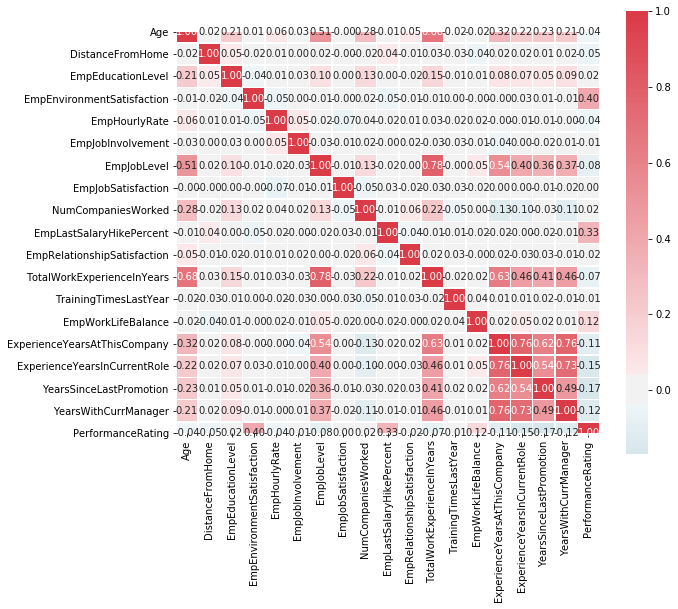

In [48]:
def HeatMap(emp_data,x=True):
        correlations = emp_data.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()
HeatMap(emp_data,x=True)